In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [3]:
Config().data_path()

PosixPath('/home/paperspace/.fastai/data')

Set the variable `path` to `Config().data_path()/'rossmann'`.

In [4]:
path = Config().data_path()/'rossmann'

Set `train_df` to the pickled dataset at `path/'train_clean'`.

In [5]:
train_df = pd.read_pickle(path/'train_clean')

Show a transposed output of `train_df`.

In [6]:
train_df.T

,1,2,3,4,6,7,8,9,10,11,...,1017198,1017199,1017200,1017201,1017202,1017204,1017205,1017206,1017207,1017208
Store,1,1,1,1,1,1,1,1,1,1,...,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115
DayOfWeek,3,4,5,6,1,2,3,4,5,6,...,2,3,4,5,6,1,2,3,4,5
Date,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00,2013-01-10 00:00:00,2013-01-11 00:00:00,2013-01-12 00:00:00,...,2015-07-21 00:00:00,2015-07-22 00:00:00,2015-07-23 00:00:00,2015-07-24 00:00:00,2015-07-25 00:00:00,2015-07-27 00:00:00,2015-07-28 00:00:00,2015-07-29 00:00:00,2015-07-30 00:00:00,2015-07-31 00:00:00
Sales,5530,4327,4486,4997,7176,5580,5471,4892,4881,4952,...,5074,5342,6150,5816,6897,10712,8093,7661,8405,8680
Customers,668,578,619,635,785,654,626,615,592,646,...,352,382,435,417,478,608,500,473,502,538
Open,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Promo,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,1,1,1,1,1
StateHoliday,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SchoolHoliday,True,True,True,True,True,True,True,True,True,False,...,False,False,False,False,False,True,True,True,True,True
Year,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015


Set the len of `train_df` to `n`, and print it out.

In [7]:
n = len(train_df); n

844338

### Experimenting with a sample

Set `idx` to a random permutation of `range(n)` up to the 2000th position.

In [8]:
np.random.seed(42)
idx = np.random.permutation(range(n))[:2000]

In [9]:
idx[:10]

array([652540, 545800, 346922, 172720,  30616,  39420, 600103,  33513,  40059, 645513])

Sort `idx`.

In [10]:
idx = sorted(idx)

In [11]:
idx[:10]

[123, 305, 395, 920, 3076, 3164, 3472, 3550, 4388, 4658]

Set `small_train_df` to be `train_df` up to the 1000th value in `idx`.

In [12]:
small_train_df = train_df.loc[idx[:1000],:]

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Set `small_test_df` to be `train_df` from the 1000th value on in `idx`.

In [13]:
small_test_df = train_df.loc[idx[1000:], :]

Set `small_cont_vars` to `['CompetitionDistance', 'Mean_Humidity']`

In [14]:
small_cont_vars = ['CompetitionDistance', 'MeanHumidity']

Set `small_cat_vars` to `['Store', 'DayOfWeek', 'PromoInterval']`.

In [15]:
small_cat_vars = ['Store', 'DayOfWeek', 'PromoInterval']

Make `small_train_df` and `small_test_df` have only those variables.

In [16]:
small_train_df = small_train_df.loc[:, small_cont_vars + small_cat_vars + ['Sales']]

In [17]:
small_test_df = small_test_df.loc[:, small_cont_vars + small_cat_vars]

Show `small_train_df`'s first few rows.

In [18]:
small_train_df.head(25)

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval,Sales
123,1270.0,NaN,1.0,6.0,NaN,5912.0
305,1270.0,NaN,1.0,6.0,NaN,5233.0
395,1270.0,NaN,1.0,5.0,NaN,4906.0
920,1270.0,NaN,1.0,5.0,NaN,3808.0
3076,NaN,NaN,NaN,NaN,NaN,NaN
3164,620.0,NaN,4.0,4.0,NaN,12178.0
3472,620.0,NaN,4.0,4.0,NaN,8763.0
3550,NaN,NaN,NaN,NaN,NaN,NaN
4388,29910.0,NaN,5.0,6.0,NaN,2107.0
4658,29910.0,NaN,5.0,3.0,NaN,4191.0


Same with `small_test_df`.

In [19]:
small_test_df.head(25)

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval
421039,44320.0,NaN,462.0,1.0,NaN
422193,4160.0,NaN,463.0,3.0,NaN
422252,4160.0,NaN,463.0,6.0,NaN
422263,4160.0,NaN,463.0,3.0,NaN
422278,4160.0,NaN,463.0,4.0,NaN
422669,4160.0,NaN,463.0,3.0,NaN
422890,520.0,NaN,464.0,3.0,NaN
422923,520.0,NaN,464.0,1.0,NaN
422989,NaN,NaN,NaN,NaN,NaN
423287,520.0,NaN,464.0,1.0,NaN


Instantiate a `Categorify` with `small_cat_vars` and `small_cont_vars` and call it `categorify`. Call `categorify` on `small_train_df`. Do it again on `small_test_df` with `test=True`.

In [20]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

Show the first few rows of `small_test_df`.

In [21]:
small_test_df[:10]

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval
421039,44320.0,NaN,NaN,1.0,NaN
422193,4160.0,NaN,NaN,3.0,NaN
422252,4160.0,NaN,NaN,6.0,NaN
422263,4160.0,NaN,NaN,3.0,NaN
422278,4160.0,NaN,NaN,4.0,NaN
422669,4160.0,NaN,NaN,3.0,NaN
422890,520.0,NaN,NaN,3.0,NaN
422923,520.0,NaN,NaN,1.0,NaN
422989,NaN,NaN,NaN,NaN,NaN
423287,520.0,NaN,NaN,1.0,NaN


Show the categories from `small_train_df.PromoInterval`.

In [22]:
small_train_df['PromoInterval']

123                   NaN
305                   NaN
395                   NaN
920                   NaN
3076                  NaN
3164                  NaN
3472                  NaN
3550                  NaN
4388                  NaN
4658                  NaN
5501                  NaN
5845                  NaN
6558                  NaN
6588                  NaN
6606                  NaN
6736                  NaN
6919                  NaN
7290                  NaN
7322                  NaN
7684                  NaN
7829                  NaN
8216                  NaN
8532                  NaN
8737                  NaN
9318                  NaN
9420                  NaN
9731      Jan,Apr,Jul,Oct
9814      Jan,Apr,Jul,Oct
9831                  NaN
10110     Jan,Apr,Jul,Oct
               ...       
404041                NaN
405175                NaN
405389                NaN
405976    Feb,May,Aug,Nov
405989                NaN
406316    Feb,May,Aug,Nov
406493                NaN
406602    Fe

Show the `small_train_df` column.

In [23]:
small_train_df.head()

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval,Sales
123,1270.0,NaN,1.0,6.0,NaN,5912.0
305,1270.0,NaN,1.0,6.0,NaN,5233.0
395,1270.0,NaN,1.0,5.0,NaN,4906.0
920,1270.0,NaN,1.0,5.0,NaN,3808.0
3076,NaN,NaN,NaN,NaN,NaN,NaN


Show the first 5 categorical codes from `small_train_df['PromoInterval']`.

In [24]:
small_train_df['PromoInterval'].cat.categories[:5]

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

Instantiate a `FillMissing` object in the same way, and call it `fill_missing`. Call it like a function applied to `small_train_df` and `small_test_df`.

In [25]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df)

A new column, `CompetitionDistance_na` exists on the train dataframe. Show the rows where it's `True`.

In [26]:
small_train_df[small_train_df['CompetitionDistance_na']]

,CompetitionDistance,MeanHumidity,Store,DayOfWeek,PromoInterval,Sales,CompetitionDistance_na,MeanHumidity_na
3076,2610.0,NaN,NaN,NaN,NaN,NaN,True,True
3550,2610.0,NaN,NaN,NaN,NaN,NaN,True,True
6588,2610.0,NaN,NaN,NaN,NaN,NaN,True,True
6606,2610.0,NaN,NaN,NaN,NaN,NaN,True,True
8532,2610.0,NaN,NaN,NaN,NaN,NaN,True,True
9420,2610.0,NaN,NaN,NaN,NaN,NaN,True,True
9831,2610.0,NaN,NaN,NaN,NaN,NaN,True,True
10395,2610.0,NaN,NaN,NaN,NaN,NaN,True,True
11561,2610.0,NaN,NaN,NaN,NaN,NaN,True,True
12081,2610.0,NaN,NaN,NaN,NaN,NaN,True,True


### Preparing full data set

Read the full `train_clean` to `train_df`.

In [27]:
train_df = pd.read_pickle(path/'train_clean')

Read the full `test_clean` to `test_df`.

In [28]:
test_df = pd.read_pickle(path/'test')

Print out `len(train_df)` and `len(test_df)`.

In [29]:
len(train_df)

844338

In [30]:
len(test_df)

41088

Set our `procs` to `FillMissing`, `Categorify`, and `Normalize`.

In [31]:
procs = [FillMissing, Categorify, Normalize]

This:
```
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']
```

In [32]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fwd', 'Promo_bwd', 'StateHoliday_fwd', 'StateHoliday_bwd',
    'SchoolHoliday_fwd', 'SchoolHoliday_bwd']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [33]:
dep_var = 'Sales'

Set `dep_var` to `Sales`.

Constrain the columns in `df` to `cat_vars`, `cont_vars`, `dep_var`, and `Date`.

In [34]:
train_df = train_df.loc[:, cat_vars + cont_vars + [dep_var, 'Date']]

Show the `min` and `max` `Date`.

In [35]:
train_df.Date.min()

Timestamp('2013-01-01 00:00:00')

In [36]:
train_df.Date.max()

Timestamp('2015-07-31 00:00:00')

Show the length of `test_df`.

In [37]:
len(test_df)

41088

Create a variable `cut` that represents the cutoff point before which all rows will be part of the validation set. The logic here is that we want it to be about as big as the test set, but that it should be comprised of all complete days that don't exist in the training set. You'll want to get the maximum index of the rows sharing the date found at the `len(test_df)`th row of the training set. In other words: find the date at `len(test_df)` and find the _last_ index in the training set that shares that date.

In [38]:
train_df['Date'][len(test_df)]

Timestamp('2015-01-15 00:00:00')

In [39]:
cut = train_df.index[train_df['Date'] == train_df['Date'][len(test_df)]].max()

In [40]:
cut

1017011

Set `valid_idx` to the range of values up to `cut`.

In [41]:
valid_idx = idx[:cut]

Show the first few rows of `df[dep_var]`.

In [42]:
train_df[dep_var].head()

1    5530
2    4327
3    4486
4    4997
6    7176
Name: Sales, dtype: int64

Create a data bunch from the `df` that we've created. Hints:
- This will start with a `TabularList`
- You can use `split_by_idx` to specify the validation indices
- You can label from the df using `label_from_df`. Remember to specify `label_cls=FloatList` to mark this as a regression problem, and to specify that `log=True`.
- Use `add_test` to add aa test set
- Call `databunch()` to turn the `TabularList` into a `DataBunch`.

In [43]:
data = (TabularList.from_df(train_df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
        .split_by_idx(valid_idx)
        .label_from_df('Sales', label_cls=FloatList, log=True)
        .add_test(TabularList.from_df(test_df, cat_names=cat_vars, cont_names=cont_vars, procs=procs))
        .databunch())

## Model

Set `max_log_y` to the log of the `Sales` column + 20%. Set `y_range` to a 2-element torch tensor with the first element being `0` and the second element being `max_log_y`. Set `device` to `defaults.device`. What does this last part do?

In [44]:
max_log_y = np.max(np.log(train_df['Sales']))*1.2

In [45]:
y_range = torch.tensor([0, max_log_y], device=defaults.device)

Create a learner using the databunch you created earlier, with layers `1000,500`, `ps=[0.001, 0.01]`, `emb_drop = 0.04`, with the `y_range` you created above. Your metrics should be `exp_rmspe`.

In [46]:
learn = tabular_learner(
    data, 
    layers=[1000, 500], 
    ps=[0.001, 0.01], 
    emb_drop=0.04, 
    y_range=y_range, 
    metrics=exp_rmspe
)

Show the model object.

In [47]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(22, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
    (24): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=236, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, trac

Show the len of `cont_names` in the `train_ds`.

In [48]:
len(learn.data.train_ds.cont_names)

16

In [49]:
len(learn.data.train_ds.cat_names)

25

Use the learning rate finder.

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


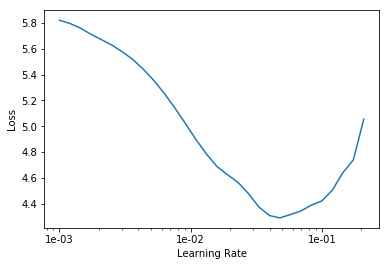

In [51]:
learn.recorder.plot(skip_start=50, skip_end=20)

Show the learning rate plot. The ideal starting spot should be around `1e-2 - 1e-3`.

Fit one cycle with 5 epochs at the learning rate you found, with rate decay 0.2.

In [53]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.037811,0.032718,0.207435,02:20
1,0.039010,0.037289,0.222863,02:21
2,0.033058,0.075782,0.187472,02:20
3,0.022688,0.049314,0.142541,02:20
4,0.013033,0.012592,0.106081,02:23


Save the learner to `l`.

In [54]:
learn.save('l')

Show the losses, skipping the first 7000 batches processed.

Load `l`.

In [55]:
learn = learn.load('l')

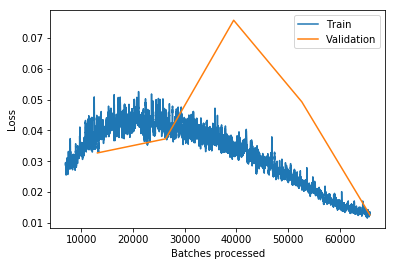

In [56]:
learn.recorder.plot_losses(skip_start=7000)

Fit another cycle with 5 epochs and learning rate 3e-4.

In [57]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.014130,0.011400,0.102612,02:19
1,0.013348,0.017620,0.106621,02:23
2,0.012311,0.017566,0.104436,02:21
3,0.010159,0.019636,0.098951,02:22
4,0.010949,0.020292,0.101341,02:23


In [58]:
learn.save('l2')

In [59]:
learn.load('l2')

Learner(data=TabularDataBunch;

Train: LabelList (842338 items)
x: TabularList
Store 1; DayOfWeek 3; Year 2013; Month 1; Day 2; StateHoliday False; CompetitionMonthsOpen 24.0; Promo2Weeks 25.0; StoreType c; Assortment a; PromoInterval #na#; CompetitionOpenSinceYear 2008.0; Promo2SinceYear 1900.0; State HE; Week 1; Events #na#; Promo_fwd 2.0; Promo_bwd 0.0; StateHoliday_fwd 0.0; StateHoliday_bwd 1.0; SchoolHoliday_fwd 7.0; SchoolHoliday_bwd 2.0; CompetitionDistance_na False; CloudCover_na False; trend_DE_na True; CompetitionDistance -0.5358; Max_TemperatureC -0.9875; Mean_TemperatureC -0.9821; Min_TemperatureC -0.9180; Max_Humidity 0.8733; Mean_Humidity 0.8388; Min_Humidity 0.8722; Max_Wind_SpeedKm_h -0.4059; Mean_Wind_SpeedKm_h -0.1428; CloudCover 0.2675; trend 0.6815; trend_DE -0.0017; AfterStateHoliday -1.2015; BeforeStateHoliday -1.5080; Promo -0.8979; SchoolHoliday 2.0413; ,Store 1; DayOfWeek 4; Year 2013; Month 1; Day 3; StateHoliday False; CompetitionMonthsOpen 24.0; Promo2Weeks 

Fit another cycle with 5 epochs and lr = 3e-4.

In [60]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.011821,0.030211,0.106425,02:22
1,0.012589,0.033812,0.120580,02:22
2,0.012109,0.041875,0.107683,02:23
3,0.010410,0.031235,0.111183,02:21
4,0.010063,0.034445,0.106632,02:21


In [61]:
learn.save('l3')

In [62]:
learn.load('l2')

Learner(data=TabularDataBunch;

Train: LabelList (842338 items)
x: TabularList
Store 1; DayOfWeek 3; Year 2013; Month 1; Day 2; StateHoliday False; CompetitionMonthsOpen 24.0; Promo2Weeks 25.0; StoreType c; Assortment a; PromoInterval #na#; CompetitionOpenSinceYear 2008.0; Promo2SinceYear 1900.0; State HE; Week 1; Events #na#; Promo_fwd 2.0; Promo_bwd 0.0; StateHoliday_fwd 0.0; StateHoliday_bwd 1.0; SchoolHoliday_fwd 7.0; SchoolHoliday_bwd 2.0; CompetitionDistance_na False; CloudCover_na False; trend_DE_na True; CompetitionDistance -0.5358; Max_TemperatureC -0.9875; Mean_TemperatureC -0.9821; Min_TemperatureC -0.9180; Max_Humidity 0.8733; Mean_Humidity 0.8388; Min_Humidity 0.8722; Max_Wind_SpeedKm_h -0.4059; Mean_Wind_SpeedKm_h -0.1428; CloudCover 0.2675; trend 0.6815; trend_DE -0.0017; AfterStateHoliday -1.2015; BeforeStateHoliday -1.5080; Promo -0.8979; SchoolHoliday 2.0413; ,Store 1; DayOfWeek 4; Year 2013; Month 1; Day 3; StateHoliday False; CompetitionMonthsOpen 24.0; Promo2Weeks 

10th place in the competition was 0.108. How low can you get? 

Get the predictions from the test set and set them to `test_preds`. Set `test_df['Sales']` to the exponentiated values of `test_preds[0].data`, converted to a numpy array, and then call `T[0]`. Why did you have to do `test_preds[0].data`? Why `.T[0]`? Replace `test_df[["Id", "Sales"]]` with an int-ified version of itself. Write it out to a `csv` `rossmann_submission.csv` without an index.

In [72]:
test_preds = learn.get_preds(DatasetType.Test)

In [73]:
test_df['Sales'] = np.array(np.exp(test_preds[0].data)).T[0]

In [86]:
np.array(np.exp(test_preds[0].data)).T[0]

array([ 4258.037 ,  6837.734 ,  8807.835 ,  7011.8857, ...,  6936.708 ,  5944.2456, 24253.525 ,  7070.6626],
      dtype=float32)

I'm not sure what calling `.data` does. Calling `.T` gets us the transpose, but then we have a 2d matrix with one very long row. To turn this into a 1d vector, we take the entire first row by indexing `[0]`.

In [90]:
test_df[["Id", "Sales"]] = test_df[["Id", "Sales"]].astype({"Id": np.int64, "Sales": np.int64})

In [91]:
test_df[["Id", "Sales"]].head()

,Id,Sales
0,1,4258
1,2,6837
2,3,8807
3,4,7011
4,5,7282


In [92]:
test_df[["Id", "Sales"]].to_csv("rossmann_submission.csv", index=False)

In [94]:
from IPython.display import FileLink
FileLink("rossmann_submission.csv")

/home/paperspace/course-v3/nbs/dl1/rossmann_submission.csv